<a href="https://colab.research.google.com/github/ums-l200220279/Machine-Learning-for-Breast-Cancer-Diagnosis/blob/main/Klasifikasi_Breast_Cancer_Wisconsin_(Diagnostic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Fea

<ipython-input-2-e4dea481db2d>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=data, palette='coolwarm')


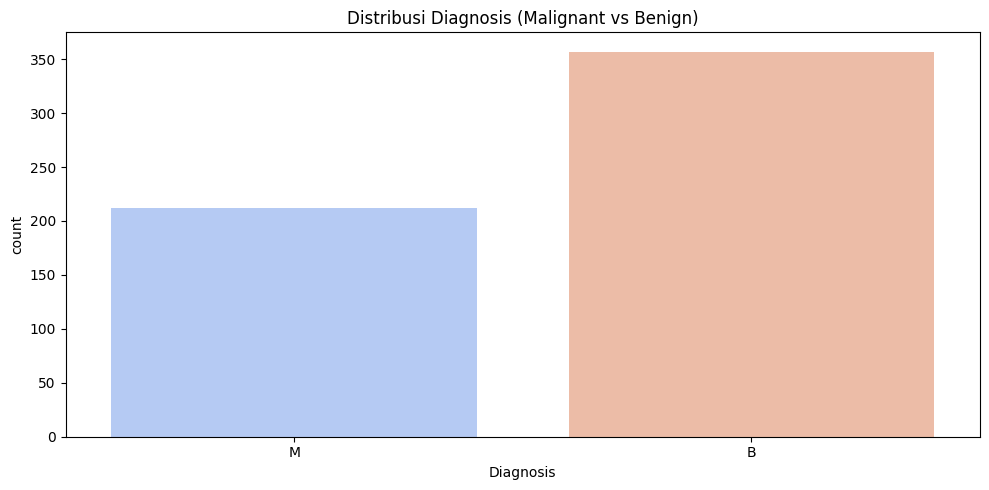

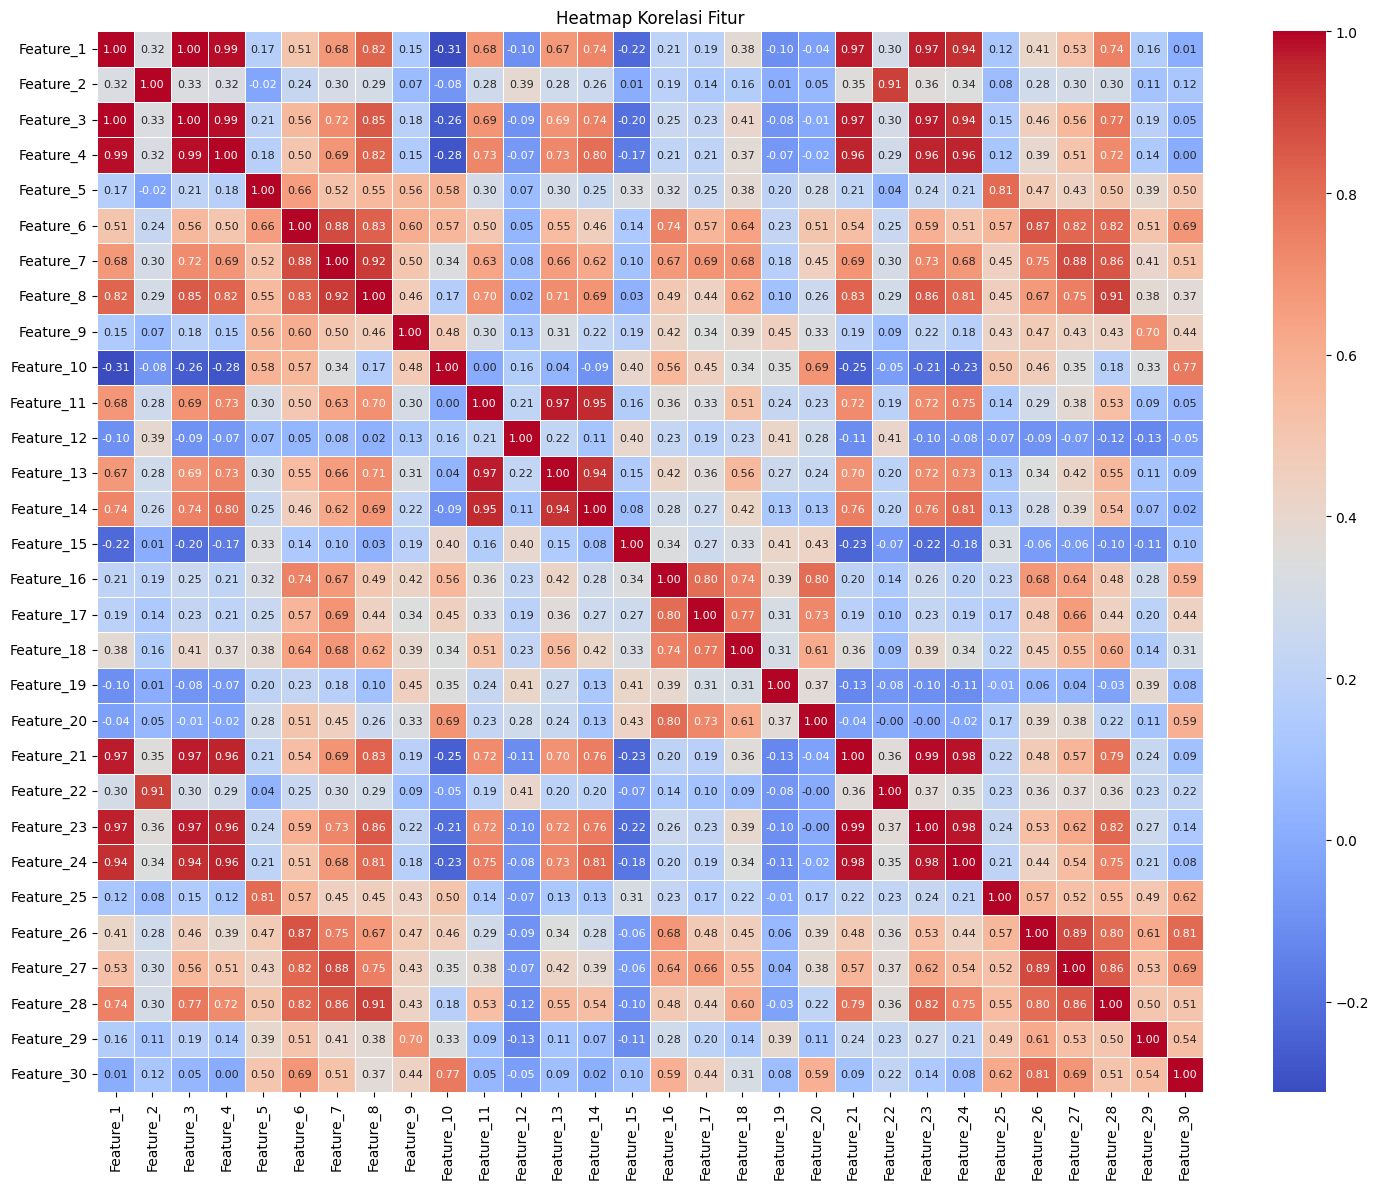


Random Forest Classification Report:

              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


SVM Classification Report:

              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        71
   Malignant       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


K-Nearest Neighbors Classification Report:

              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg   

<ipython-input-2-e4dea481db2d>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='coolwarm')


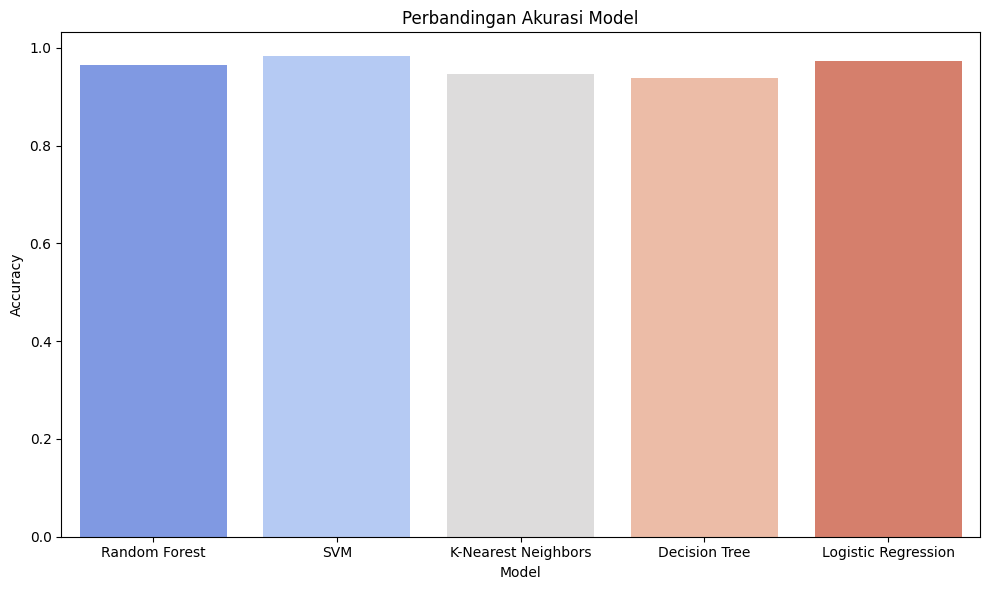


Data performa model disimpan di '/content/drive/My Drive/Models_Performance/model_performance_20241124_025348.csv'.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from google.colab import drive
import os
from datetime import datetime

def load_data(url):
    """
    Memuat dataset Breast Cancer dari URL UCI dan menambahkan nama kolom.
    """
    columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
    data = pd.read_csv(url, names=columns)
    return data


def explore_data(data):
    """
    Melakukan eksplorasi awal data untuk analisis dan visualisasi.
    """
    print("\nData Info:\n", data.info())
    print("\nMissing Values:\n", data.isnull().sum())

    # Visualisasi distribusi diagnosis
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Diagnosis', data=data, palette='coolwarm')
    plt.title("Distribusi Diagnosis (Malignant vs Benign)")
    plt.tight_layout()
    plt.show()

    # Heatmap korelasi fitur
    corr = data.iloc[:, 2:].corr()
    plt.figure(figsize=(15, 12))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True,
                linewidths=0.5, annot_kws={"size": 8})
    plt.title("Heatmap Korelasi Fitur")
    plt.tight_layout()
    plt.show()


def preprocess_data(data):
    """
    Melakukan pra-pemrosesan data: encoding diagnosis, normalisasi, dan pembagian data.
    """
    data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
    X = data.iloc[:, 2:].values
    y = data['Diagnosis'].values

    # Pembagian data menjadi data latih dan data uji (80% untuk latih, 20% untuk uji)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standarisasi fitur
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    Melatih dan mengevaluasi beberapa model pembelajaran mesin: Random Forest, SVM, KNN, Decision Tree, Logistic Regression.
    """
    models = {
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression()
    }

    performance_data = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'], output_dict=True)

        # Menyimpan hasil evaluasi
        performance_data.append({
            'Model': name,
            'Accuracy': report['accuracy'],
            'Precision (Malignant)': report['Malignant']['precision'],
            'Recall (Malignant)': report['Malignant']['recall'],
            'F1-Score (Malignant)': report['Malignant']['f1-score'],
            'Precision (Benign)': report['Benign']['precision'],
            'Recall (Benign)': report['Benign']['recall'],
            'F1-Score (Benign)': report['Benign']['f1-score'],
        })

        print(f"\n{name} Classification Report:\n")
        print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

    return performance_data


def compare_models(performance_data):
    """
    Membandingkan hasil evaluasi model dan menampilkan perbandingan akurasi.
    """
    # Membuat DataFrame dari data performa
    df = pd.DataFrame(performance_data)
    print("\nModel Performance Comparison:\n", df)

    # Visualisasi perbandingan akurasi model
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Accuracy', data=df, palette='coolwarm')
    plt.title("Perbandingan Akurasi Model")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()

    # Menyimpan hasil performa ke Google Drive dalam folder 'Models_Performance'
    save_path = '/content/drive/My Drive/Models_Performance'

    # Membuat folder jika belum ada
    os.makedirs(save_path, exist_ok=True)

    # Menentukan nama file berdasarkan timestamp untuk mencegah penimpaan
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    file_name = f"model_performance_{timestamp}.csv"
    file_path = os.path.join(save_path, file_name)

    # Menyimpan DataFrame sebagai CSV dengan nama unik
    df.to_csv(file_path, index=False)
    print(f"\nData performa model disimpan di '{file_path}'.")

    return file_path


def main():
    """
    Fungsi utama untuk memuat, memproses, melatih, dan mengevaluasi model.
    """
    # Mount Google Drive
    drive.mount('/content/drive')

    # URL dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

    # Memuat dan mengeksplorasi data
    data = load_data(url)
    explore_data(data)

    # Pra-pemrosesan data
    X_train, X_test, y_train, y_test = preprocess_data(data)

    # Melatih dan mengevaluasi model
    performance_data = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Membandingkan model dan menyimpan hasil
    compare_models(performance_data)


if __name__ == "__main__":
    main()


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Fea

<ipython-input-1-9dcfec7f40b7>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=data, palette='coolwarm')


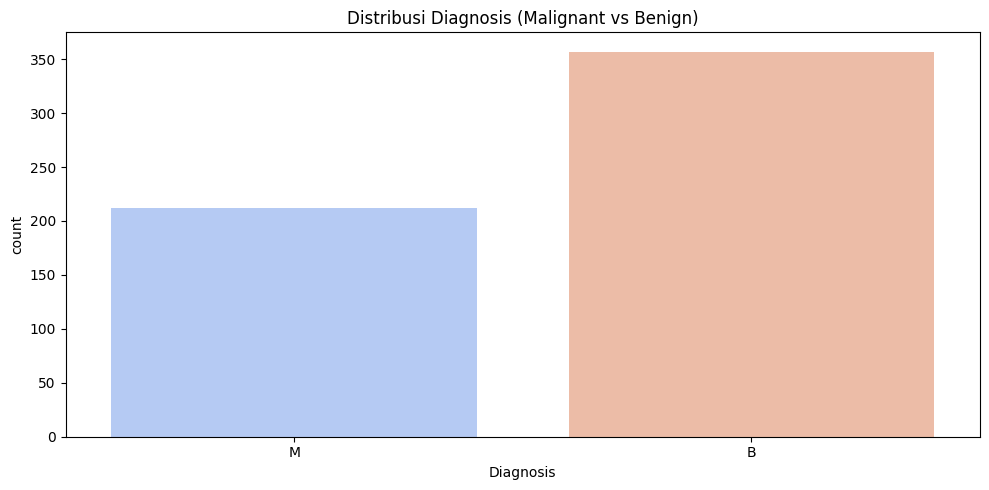

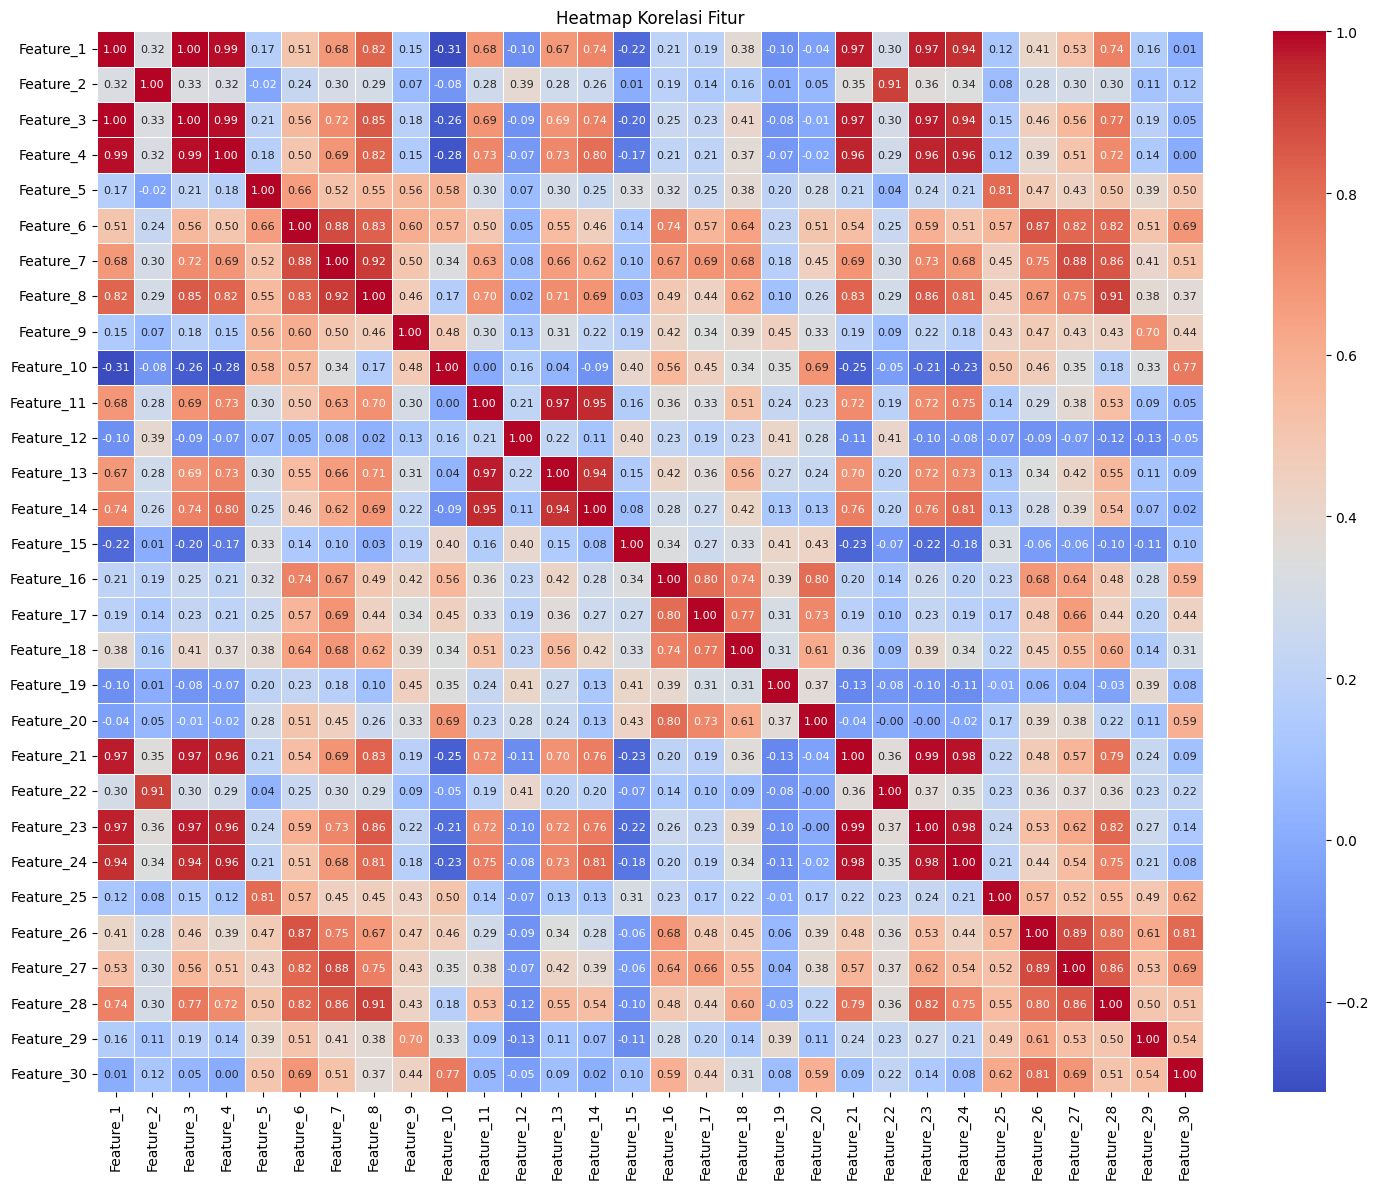


Interpretasi:
Distribusi Diagnosis menunjukkan ketidakseimbangan kelas yang sedikit, dengan lebih banyak sampel Benign dibandingkan Malignant.
Heatmap Korelasi menunjukkan fitur-fitur seperti `mean_radius` dan `mean_area` memiliki korelasi tinggi, yang mungkin menunjukkan redundansi informasi.

Random Forest Classification Report:

              precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        71
   Malignant       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


SVM Classification Report:

              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        71
   Malignant       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98    

<ipython-input-1-9dcfec7f40b7>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='coolwarm', width=0.6)  # Menyesuaikan lebar bar


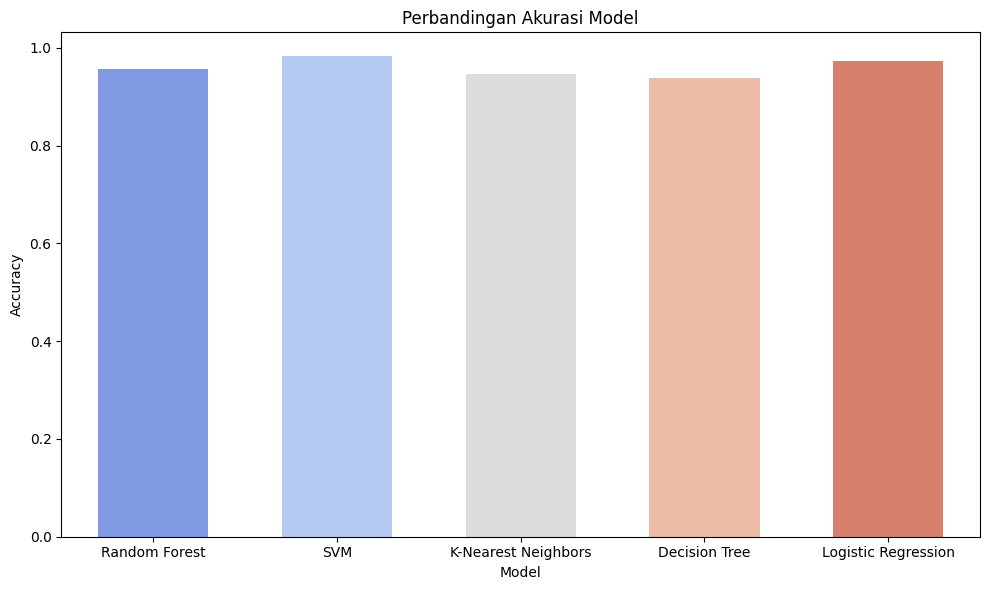

<ipython-input-1-9dcfec7f40b7>:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='coolwarm', ax=axes[i], width=0.6)  # Menyesuaikan lebar bar
<ipython-input-1-9dcfec7f40b7>:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='coolwarm', ax=axes[i], width=0.6)  # Menyesuaikan lebar bar
<ipython-input-1-9dcfec7f40b7>:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='coolwarm', ax=axes[i], width=0.6)  # Menyesuaikan lebar bar
<ipy

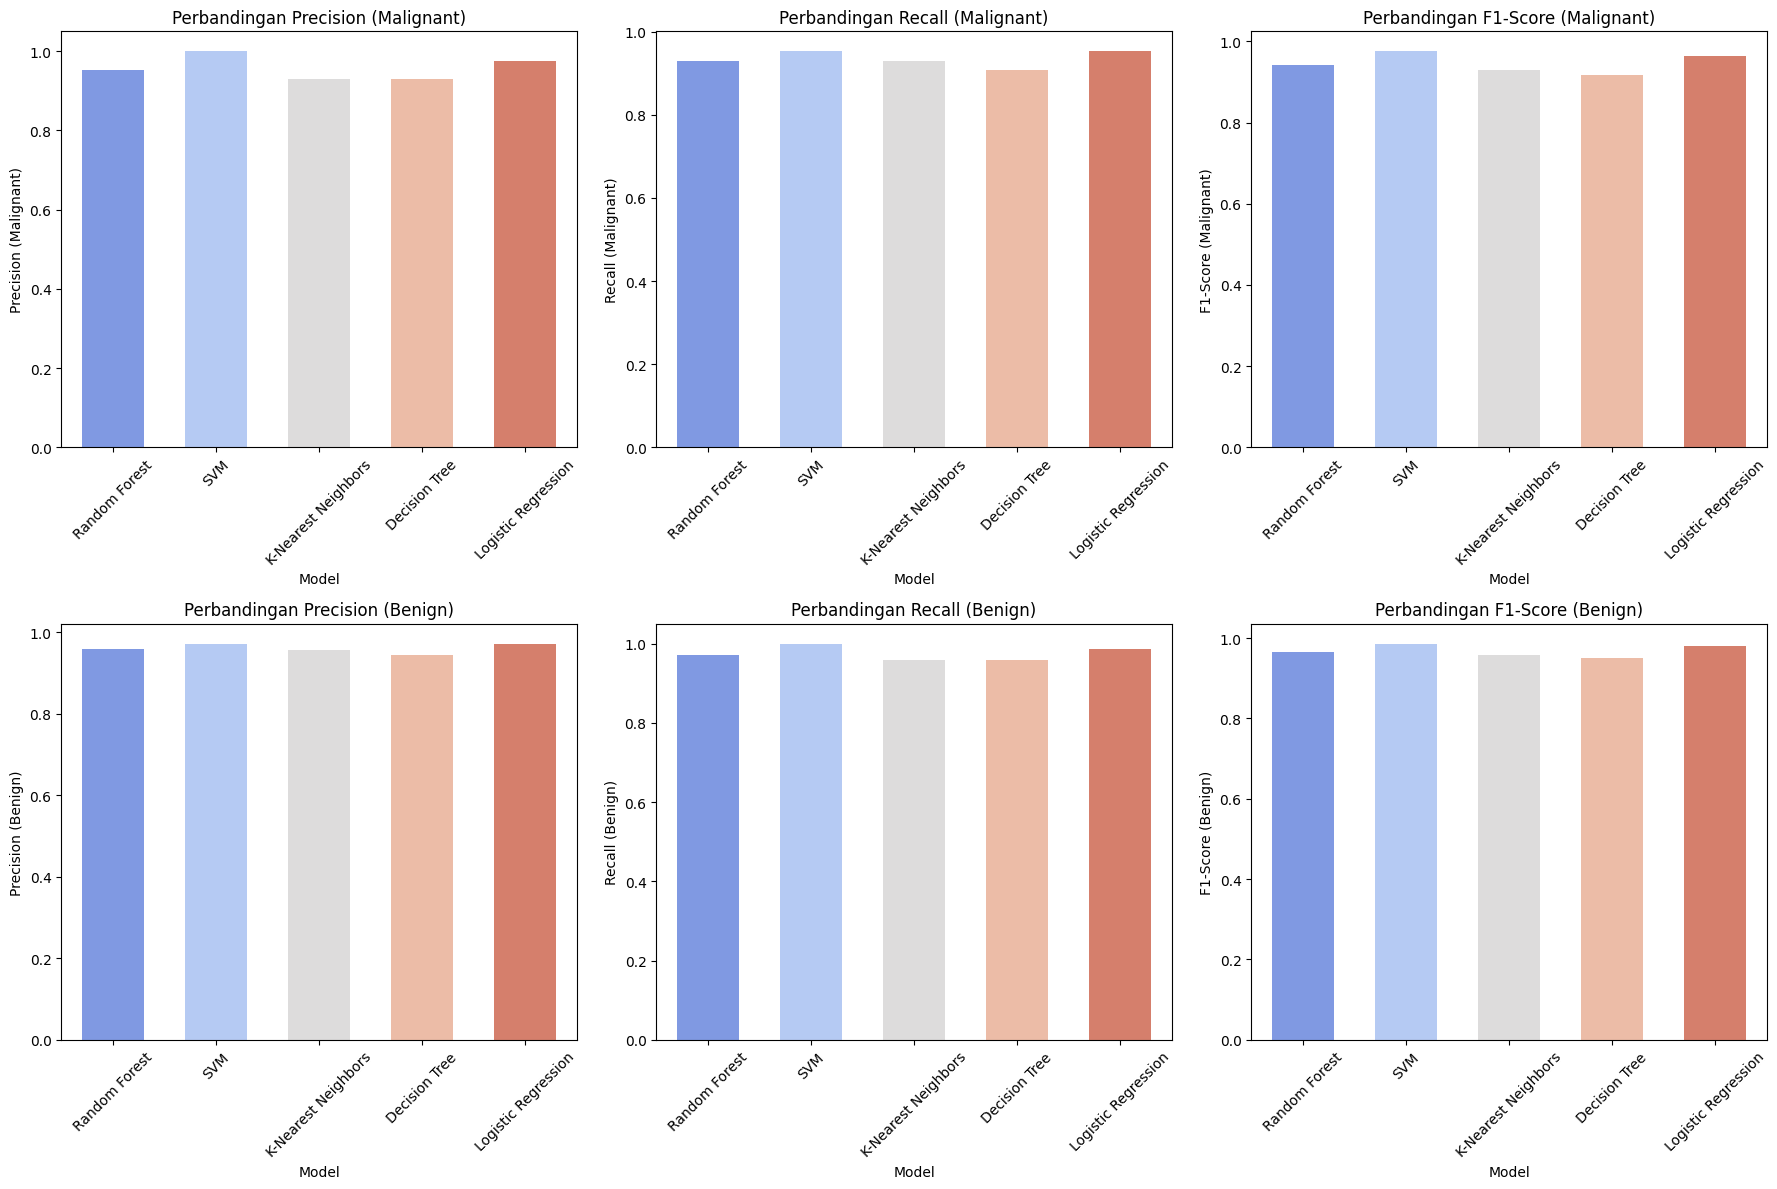


Data performa model disimpan di '/content/drive/My Drive/Models_Performance/model_performance_20241124_080840.csv'.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from google.colab import drive
import os
from datetime import datetime

def load_data(url):
    """
    Memuat dataset Breast Cancer dari URL UCI dan menambahkan nama kolom.
    """
    columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
    data = pd.read_csv(url, names=columns)
    return data


def explore_data(data):
    """
    Melakukan eksplorasi awal data untuk analisis dan visualisasi.
    """
    print("\nData Info:\n", data.info())
    print("\nMissing Values:\n", data.isnull().sum())

    # Visualisasi distribusi diagnosis
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Diagnosis', data=data, palette='coolwarm')
    plt.title("Distribusi Diagnosis (Malignant vs Benign)")
    plt.tight_layout()
    plt.show()

    # Heatmap korelasi fitur
    corr = data.iloc[:, 2:].corr()
    plt.figure(figsize=(15, 12))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True,
                linewidths=0.5, annot_kws={"size": 8})
    plt.title("Heatmap Korelasi Fitur")
    plt.tight_layout()
    plt.show()

    # Interpretasi Visualisasi
    print("\nInterpretasi:")
    print("Distribusi Diagnosis menunjukkan ketidakseimbangan kelas yang sedikit, dengan lebih banyak sampel Benign dibandingkan Malignant.")
    print("Heatmap Korelasi menunjukkan fitur-fitur seperti `mean_radius` dan `mean_area` memiliki korelasi tinggi, yang mungkin menunjukkan redundansi informasi.")


def preprocess_data(data):
    """
    Melakukan pra-pemrosesan data: encoding diagnosis, normalisasi, dan pembagian data.
    """
    data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
    X = data.iloc[:, 2:].values
    y = data['Diagnosis'].values

    # Pembagian data menjadi data latih dan data uji (80% untuk latih, 20% untuk uji)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standarisasi fitur
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    Melatih dan mengevaluasi beberapa model pembelajaran mesin: Random Forest, SVM, KNN, Decision Tree, Logistic Regression.
    """
    models = {
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression()
    }

    performance_data = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'], output_dict=True)

        # Menyimpan hasil evaluasi
        performance_data.append({
            'Model': name,
            'Accuracy': report['accuracy'],
            'Precision (Malignant)': report['Malignant']['precision'],
            'Recall (Malignant)': report['Malignant']['recall'],
            'F1-Score (Malignant)': report['Malignant']['f1-score'],
            'Precision (Benign)': report['Benign']['precision'],
            'Recall (Benign)': report['Benign']['recall'],
            'F1-Score (Benign)': report['Benign']['f1-score'],
        })

        print(f"\n{name} Classification Report:\n")
        print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

    return performance_data


def compare_models(performance_data):
    """
    Membandingkan hasil evaluasi model dan menampilkan perbandingan metrik.
    """
    # Membuat DataFrame dari data performa
    df = pd.DataFrame(performance_data)
    print("\nModel Performance Comparison:\n", df)

    # Visualisasi perbandingan akurasi model
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Accuracy', data=df, palette='coolwarm', width=0.6)  # Menyesuaikan lebar bar
    plt.title("Perbandingan Akurasi Model")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()

    # Visualisasi perbandingan metrik lainnya
    metrics = ['Precision (Malignant)', 'Recall (Malignant)', 'F1-Score (Malignant)',
               'Precision (Benign)', 'Recall (Benign)', 'F1-Score (Benign)']

    # Tentukan ukuran dan grid untuk visualisasi
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Mengatur layout agar rapi
    axes = axes.ravel()  # Flatten array untuk mempermudah indexing

    for i, metric in enumerate(metrics):
        sns.barplot(x='Model', y=metric, data=df, palette='coolwarm', ax=axes[i], width=0.6)  # Menyesuaikan lebar bar
        axes[i].set_title(f"Perbandingan {metric}")
        axes[i].set_ylabel(metric)
        axes[i].set_xlabel("Model")
        axes[i].tick_params(axis='x', rotation=45)  # Rotasi label x untuk pembacaan yang lebih jelas

    # Mengatur jarak antar subplot
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.tight_layout()
    plt.show()

    # Menyimpan hasil performa ke Google Drive dalam folder 'Models_Performance'
    save_path = '/content/drive/My Drive/Models_Performance'

    # Membuat folder jika belum ada
    os.makedirs(save_path, exist_ok=True)

    # Menentukan nama file berdasarkan timestamp untuk mencegah penimpaan
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    file_name = f"model_performance_{timestamp}.csv"
    file_path = os.path.join(save_path, file_name)

    # Menyimpan DataFrame sebagai CSV dengan nama unik
    df.to_csv(file_path, index=False)
    print(f"\nData performa model disimpan di '{file_path}'.")

    return file_path


def main():
    """
    Fungsi utama untuk memuat, memproses, melatih, dan mengevaluasi model.
    """
    # Mount Google Drive
    drive.mount('/content/drive')

    # URL dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

    # Memuat dan mengeksplorasi data
    data = load_data(url)
    explore_data(data)

    # Pra-pemrosesan data
    X_train, X_test, y_train, y_test = preprocess_data(data)

    # Melatih dan mengevaluasi model
    performance_data = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Membandingkan model dan menyimpan hasil
    compare_models(performance_data)


if __name__ == "__main__":
    main()
